# Дипломная работа

In [1]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns
sns.set_style('darkgrid')
from scipy.stats import pearsonr
import ssl

Загружаем файл

In [42]:
data = pd.read_csv('hr.csv')
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


Основные статистики для переменных

In [11]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [15]:
# отдельно посчитаем моду, так как она отсутствует в функции describe
data.mode()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.1,0.55,4.0,135,3.0,0.0,0.0,0.0,sales,low
1,NaN,NaN,NaN,156,NaN,NaN,NaN,NaN,NaN,NaN


Корреляционная матрица (визуализируем с помощью Seaborn)

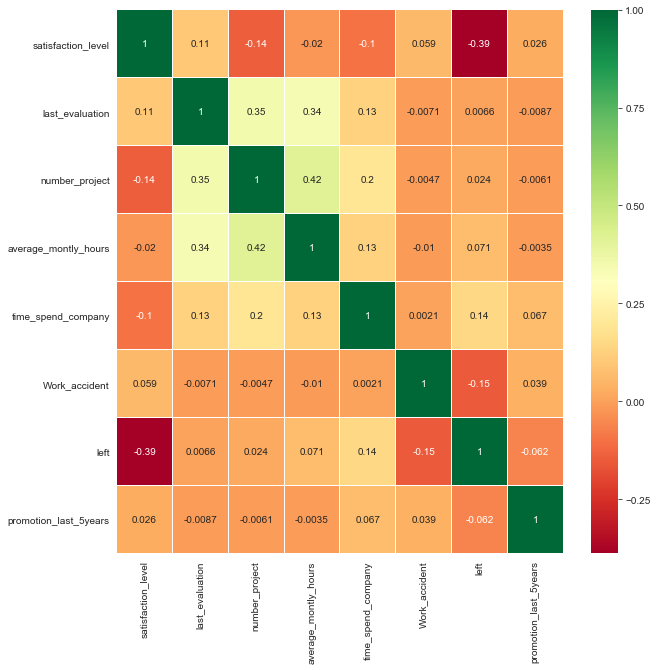

In [21]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) 
fig=plt.gcf()
fig.set_size_inches(10,10)
# fix layout
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

Визуализировать несколько взаимосвязей между переменными
Оставим в отфильтрованном датасете колонки, которые по матрице корреляций показывают наличие таковых (last_evaluation, number_project, average_monthly_hours)

In [26]:
corr_data = data[['last_evaluation', 'number_project', 'average_montly_hours']]
corr_data.head()

,last_evaluation,number_project,average_montly_hours
0,0.53,2,157
1,0.86,5,262
2,0.88,7,272
3,0.87,5,223
4,0.52,2,159


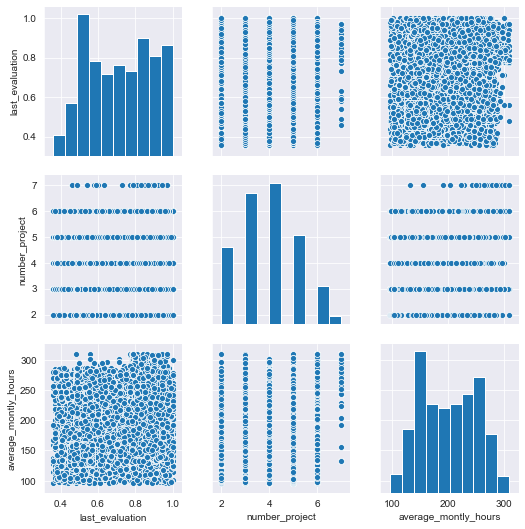

In [27]:
g = sns.pairplot(corr_data)

Из графиков, которые мы построили, видно, как интересна и разнообразна бывает статистика. Корреляционная матрица показывала наличие наилучших корреляций среди этих показателей, однако мы видим, что по факту оценки либо бессмысленны, либо очевидны. Давайте попробуем понять, что мы здесь видим:
1. Наибольшая группа сотрудников, если разбить по десятым балла, получила достаточно низкую оценку своей работы (0,3). Однако из первой же гистограммы видно, что преобладают сотрудники с высокими оценками (0,8 - 1 балл). Впрочем, это было видно из описательной статистики, где медиана показателя составляет 0,72
2. Видно, что во всех проектах, кроме седьмого, участвуют сотрудники с практически любой оценкой. Отличие седьмого проекта исключительно в том, что в нем участвует меньше сотрудников, чем в остальных проектах (видно на второй гистограмме), поэтому их оценки распределены неравномерно.
3. Аналогично предыдущему, видно, что в каждом проекте задействованы сотрудники с различным количеством отработанных часов. Однако в проекте №7 в основном сотрудники работают больше — по всей видимости, это связано с малым количеством сотрудников в проекте и большим количеством задач, что, закономерно, вызывает переработки.
4. Распределение оценок относительно количества отработанного времени фактически представляет собой шум. Однако с самого краю видно наличие зависимости, что сотрудники, отработавшие больше 300 часов имеют в основном высокие оценки. Попробуем визуализировать отдельно. 

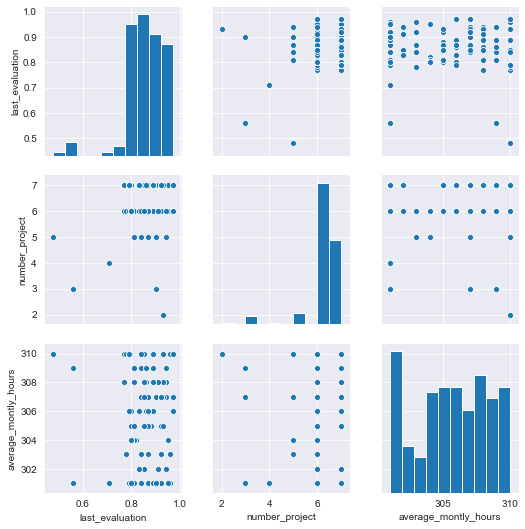

In [37]:
corr_data_ext = corr_data[(corr_data.average_montly_hours > 300)]
g = sns.pairplot(corr_data_ext)

Как видно, гипотеза подтвердилась: сотрудники, отработавшие более 300 часов, имеют в основном оценки от 0,8 и выше. Большинство из них работает в 6 и 7 проектах. 

С использованием t-test статистики проверить взаимосвязи между несколькими переменными

Сравним удовлетворенность сотрудников, которых продвигали и не продвигали по карьерной лестнице

In [39]:
promoted = data[data['promotion_last_5years']==1]['satisfaction_level']
not_promoted = data[data['promotion_last_5years']==0]['satisfaction_level']
print(stats.ttest_ind(promoted, not_promoted))

Ttest_indResult(statistic=3.1366967917856816, pvalue=0.0017119316267238923)


p-value равно 0.0017, что намного меньше стандартной альфа ошибки 0.05, поэтому мы отвергаем нулевую гипотезу и можем сказать, что  присутствует статистическое различие между удовлетворенностью этих двух групп. 

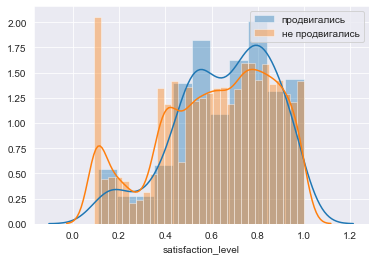

In [56]:
sns.distplot(promoted)
sns.distplot(not_promoted)
plt.legend(['продвигались', 'не продвигались'])

Сравним стаж сотрудников, у которых на работе были инциденты и у которых не было

In [41]:
incidents = data[data['Work_accident']==1]['time_spend_company']
no_incidents = data[data['Work_accident']==0]['time_spend_company']
print(stats.ttest_ind(incidents, no_incidents))

Ttest_indResult(statistic=0.2596717316698011, pvalue=0.7951205641281486)


p-value равно 0.79, что намного больше стандартной альфа ошибки 0.05, поэтому мы принимаем нулевую гипотезу и можем сказать, что  отсутствует статистическое различие между группами с инцидентами и без инцидентов по стажу. Проще говоря, совершенно не зависит от стажа, совершите вы ошибку на работе или нет.

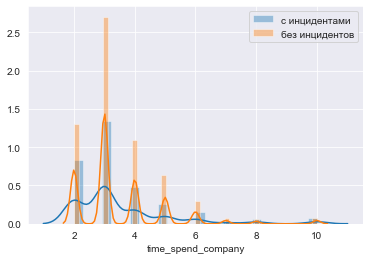

In [57]:
sns.distplot(incidents)
sns.distplot(no_incidents)
plt.legend(['с инцидентами', 'без инцидентов'])

Сравним удовлетворенность сотрудников с низкой и высокой заработной платой

In [58]:
high_salary = data[data['salary']=='high']['satisfaction_level']
low_salary = data[data['salary']=='low']['satisfaction_level']
print(stats.ttest_ind(high_salary, low_salary))

Ttest_indResult(statistic=4.76273109535092, pvalue=1.9413281282548522e-06)


p-value равно 1.94, что намного больше стандартной альфа ошибки 0.05, поэтому мы принимаем нулевую гипотезу и можем сказать, что  отсутствует статистическое различие между группами с высокой и низкой зарплатой. Проще говоря, сотрудники с любой зарплатой могут быть довольны или недовольны своей работой.

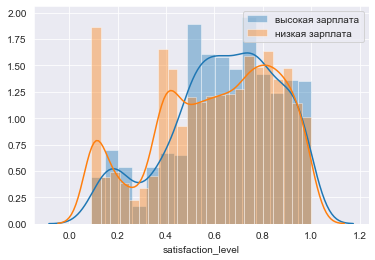

In [59]:
sns.distplot(high_salary)
sns.distplot(low_salary)
plt.legend(['высокая зарплата', 'низкая зарплата'])

Сравним средние часы, которые отрабатывают сотрудники со средней и высокой зарплатой

In [61]:
high_salary = data[data['salary']=='high']['average_montly_hours']
medium_salary = data[data['salary']=='medium']['average_montly_hours']
print(stats.ttest_ind(high_salary, medium_salary))

Ttest_indResult(statistic=-0.9654006464129494, pvalue=0.3343745714238685)


p-value равно 0.33, что больше стандартной альфа ошибки 0.05, поэтому мы принимаем нулевую гипотезу и можем сказать, что  отсутствует статистическое различие между группами с высокой и средней зарплатой. То есть сотрудники со средней и высокой зарплатой работают примерно одинаковое количество времени.

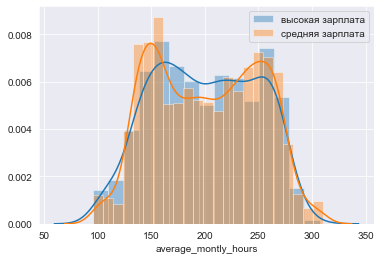

In [62]:
sns.distplot(high_salary)
sns.distplot(medium_salary)
plt.legend(['высокая зарплата', 'средняя зарплата'])

Рассчитать сколько работников работает в каждом департаменте

In [63]:
data['sales'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: sales, dtype: int64

Показать распределение сотрудников по зарплатам

In [64]:
data['salary'].value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

Показать распределение сотрудников по зарплатам совместно с департаментами

In [74]:
data_for_group = data[['salary', 'sales', 'satisfaction_level']]
data_for_group.groupby(['sales', 'salary']).count().reset_index().sort_values(by=['sales', 'salary']).head(15)

,sales,salary,satisfaction_level
0,IT,high,83
1,IT,low,609
2,IT,medium,535
3,RandD,high,51
4,RandD,low,364
5,RandD,medium,372
6,accounting,high,74
7,accounting,low,358
8,accounting,medium,335
9,hr,high,45


Сколько сотрудников покинули компанию

In [76]:
data[data['left'] == 1]['left'].count()

3571

Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию. Оценки проведем с помощью t-test.

Проверим, насколько отличается удовлетворенность сотрудников, которые остаются сотрудниками компании, и уволенных сотрудников

In [77]:
work_satisfaction = data[data['left']==0]['satisfaction_level']
fired_satisfaction = data[data['left']==1]['satisfaction_level']
print(stats.ttest_ind(work_satisfaction, fired_satisfaction))

Ttest_indResult(statistic=51.61280155890104, pvalue=0.0)


p-value равно 0, что меньше стандартной альфа ошибки 0.05, поэтому мы отвергаем нулевую гипотезу и можем сказать, что имеется статистическое различие между группами уволенных и работающих. То есть одной из причин увольнения могла быть неудовлетворенность работой. 

В то же время, данные могут быть испорчены, если, например, показатель удовлетворенности снимается несколько раз и обновляется у сотрудников, и у уволенных сотрудников он был обновлен после новости о грядущем увольнении — такая новость точно уменьшает показатель. 

К сожалению, из условий нам это неизвестно, поэтому такое предположение мы опустим и примем факт — удовлетворенности отличаются и, как видно из графика ниже, у работающих они выше.

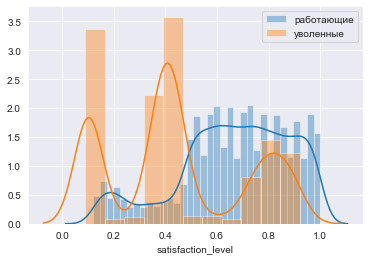

In [78]:
sns.distplot(work_satisfaction)
sns.distplot(fired_satisfaction)
plt.legend(['работающие', 'уволенные'])

Проверим, как различается оценка работающих и уволенных сотрудников

In [80]:
work_evaluation = data[data['left']==0]['last_evaluation']
fired_evaluation = data[data['left']==1]['last_evaluation']
print(stats.ttest_ind(work_evaluation, fired_evaluation))

Ttest_indResult(statistic=-0.8042416167796329, pvalue=0.4212701963735056)


p-value равно 0.42, что больше стандартной альфа ошибки 0.05, поэтому мы принимаем нулевую гипотезу и можем сказать, что отсутствует статистическое различие между группами уволенных и работающих. То есть сотрудников, возможно, нечасто увольняют из-за низких оценок, а сами сотрудники, получив низкую оценку, не стремятся незамедлительно покинуть компанию.

Однако на графике видно, что среди уволенных достаточно немалая концентрация сотрудников с оценкой в диапазоне 0,4-0,6. В то же время, среди работающих сотрудников довольно мало сотрудников с оценкой 0,4-0,5. Видимо, все же имели место быть сокращения персонала с плохими оценками.

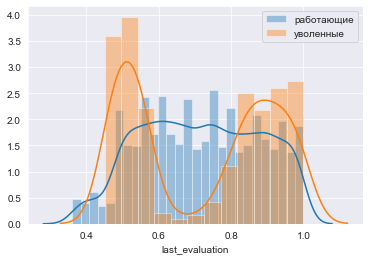

In [81]:
sns.distplot(work_evaluation)
sns.distplot(fired_evaluation)
plt.legend(['работающие', 'уволенные'])

Оценим, были ли переработки у уволенных сотрудников. Для этого предположим, что все, кто работали более 200 часов — работали много.

In [83]:
data_200 = data[data.average_montly_hours > 200]
work_workalot = data_200[data_200['left']==0]['average_montly_hours']
fired_workalot = data_200[data_200['left']==1]['average_montly_hours']
print(stats.ttest_ind(work_workalot, fired_workalot))

Ttest_indResult(statistic=-35.89470496940046, pvalue=1.8350931773578748e-260)


p-value значительно меньше стандартной альфа ошибки 0.05, поэтому мы отвергаем нулевую гипотезу и можем сказать, что имеется статистическое различие между группами уволенных и работающих. Как видно из графика ниже, уволенные перерабатывали значительно чаще, что также могло быть причиной для увольнений.

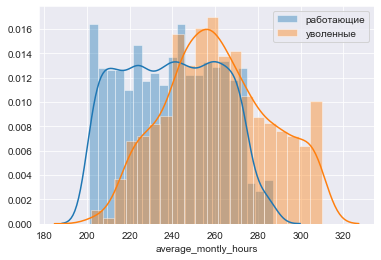

In [84]:
sns.distplot(work_workalot)
sns.distplot(fired_workalot)
plt.legend(['работающие', 'уволенные'])

Оценим количество несчастных случаев среди работающих и уволенных. Так как обе величины фактически булевы, оценим их просто количественными выборками и сделаем выводы.

In [99]:
data_for_accidents = data[['Work_accident', 'left', 'satisfaction_level']]
data_for_accidents.groupby(['left', 'Work_accident']).count().reset_index().sort_values(by=['left'])
pd.crosstab(data_for_accidents['left'],data_for_accidents['Work_accident']).apply(lambda r: r/r.sum(), axis=1)

Work_accident,0,1
left,,
0,0.824991,0.175009
1,0.952674,0.047326


Видно, что у тех, кто уже уволился, количество несчастных случаев на работе выше, чем у работающих. С другой стороны, это логичная закономерность, поскольку сотрудники могли быть уволены из-за того, что вызвали несчастные случаи или могли быть уволены по причине того, что с ними произошел несчастный случай

Оценим аналогично, какой процент сотрудников из уволившихся в последние 5 лет продвигался по службе

In [100]:
data_for_promotion = data[['promotion_last_5years', 'left', 'satisfaction_level']]
data_for_promotion.groupby(['left', 'promotion_last_5years']).count().reset_index().sort_values(by=['left'])
pd.crosstab(data_for_promotion['left'],data_for_promotion['promotion_last_5years']).apply(lambda r: r/r.sum(), axis=1)

promotion_last_5years,0,1
left,,
0,0.973749,0.026251
1,0.994679,0.005321


Как видно, в целом в компании продвигается незначительное количество людей. Однако среди покинувших компанию этот процент настолько мал и далек от средних значений по работающим, что вполне может быть оправданной гипотезой — сотрудники увольняются, поскольку не получают продвижения по службе.

Оценим наконец распределение сотрудников по уровням заработной платы

In [101]:
data_for_salary = data[['salary', 'left', 'satisfaction_level']]
data_for_salary.groupby(['left', 'salary']).count().reset_index().sort_values(by=['left'])
pd.crosstab(data_for_salary['left'],data_for_salary['salary']).apply(lambda r: r/r.sum(), axis=1)

salary,high,low,medium
left,,,
0,0.101068,0.450123,0.448810
1,0.022963,0.608233,0.368804


Заметно, что среди уволенных преобладают сотрудники с низкой зарплатой. Отсюда может следовать два вывода:
1. Компания не стремится повышать зарплаты (как низшему, так и среднему менеджменту), поэтому сотрудники и покидают ее
2. Компания сохраняет высший и средний менеджмент, активнее увольняя низший.
Оба вывода достаточно негативны для кадровой политики компании и требуют изучения.

# Спасибо за отличный курс и интересный диплом